In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Data Wrangling

In [12]:
commas = pd.read_csv('comma-survey.csv')

In [13]:
commas.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
commas.columns = ['ID', 'sentence_1', 'heard_of_comma', 'care_about_comma', 'sentence_2', 'data_number', 'data_debate',
                 'grammar_important', 'gender', 'age_group', 'income_cat', 'education', 'region']

In [15]:
# Relationship between having heard of a comma and how much you care...
commas['heard_of_comma'].value_counts()

heard_of_comma
Yes    655
No     444
Name: count, dtype: int64

In [16]:
commas['care_about_comma'].value_counts()

care_about_comma
Some          414
A lot         291
Not much      268
Not at all    126
Name: count, dtype: int64

In [17]:
raw_table = pd.crosstab(commas['heard_of_comma'], commas['care_about_comma']).reindex(columns = 
                                                        ['Not at all', 'Not much', 'Some', 'A lot'],
                                                        index = ['Yes', 'No'])
raw_table

care_about_comma,Not at all,Not much,Some,A lot
heard_of_comma,,,,
Yes,42,141,243,229
No,84,127,171,62


<Axes: xlabel='heard_of_comma'>

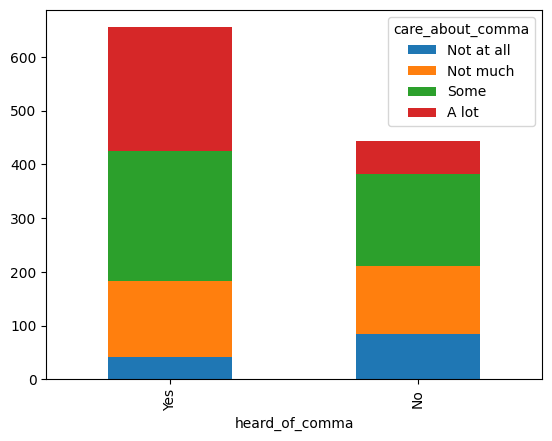

In [18]:
raw_table.plot.bar(stacked = True)

In [19]:
# Let's try that again now by normalizing
table = pd.crosstab(commas['heard_of_comma'], commas['care_about_comma'], normalize = 'index').reindex(columns = 
                                                        ['Not at all', 'Not much', 'Some', 'A lot'],
                                                        index = ['Yes', 'No'])
table

care_about_comma,Not at all,Not much,Some,A lot
heard_of_comma,,,,
Yes,0.064122,0.215267,0.370992,0.349618
No,0.189189,0.286036,0.385135,0.139640


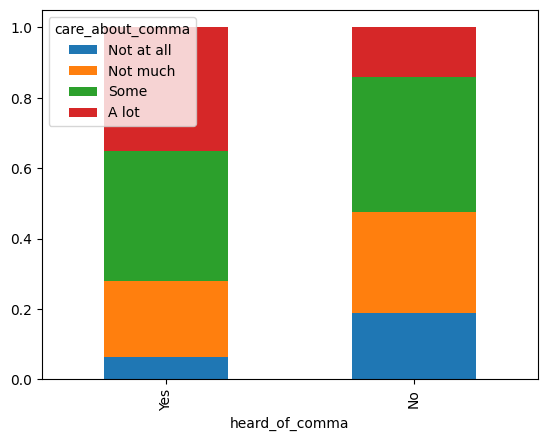

In [20]:
# Re-make plot
table.plot.bar(stacked = True)
plt.show()

## Part 2 - Making a more effective plot

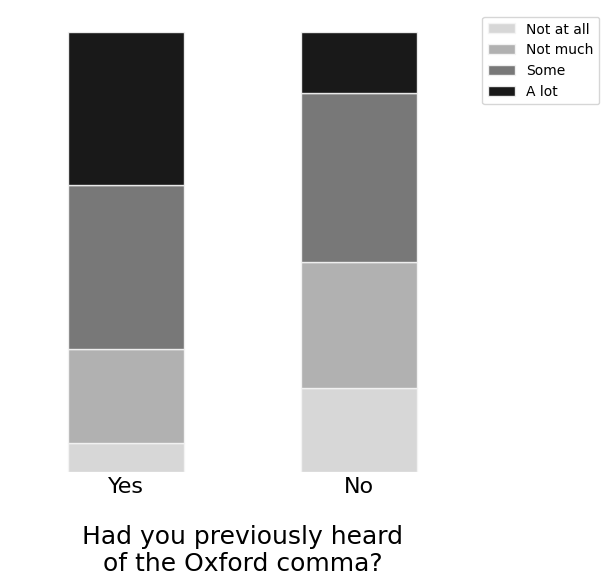

In [21]:
# Get rid of the spines.
# Change the color.
# Separate the bars.
# Make texts legible.
# Get rid of ticks.
# Get rid of the y-axis.
# Add the x-axis label.
# Move the legend somewhere else.

ax = table.plot.bar(stacked = True, color = ['lightgrey', 'darkgrey', 'dimgrey', 'black'], figsize = [6,6], 
                    rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0)
ax.get_yaxis().set_visible(False) 
plt.xlabel('Had you previously heard\nof the Oxford comma?', fontsize = 18, labelpad = 20)
plt.legend(bbox_to_anchor = [1,1]) # Just moving it out of the way
plt.show()

In [22]:
# Let's take a look at the patches.
for i in range(len(ax.patches)):
    print(ax.patches[i])

Rectangle(xy=(-0.25, 0), width=0.5, height=0.0641221, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=0.189189, angle=0)
Rectangle(xy=(-0.25, 0.0641221), width=0.5, height=0.215267, angle=0)
Rectangle(xy=(0.75, 0.189189), width=0.5, height=0.286036, angle=0)
Rectangle(xy=(-0.25, 0.279389), width=0.5, height=0.370992, angle=0)
Rectangle(xy=(0.75, 0.475225), width=0.5, height=0.385135, angle=0)
Rectangle(xy=(-0.25, 0.650382), width=0.5, height=0.349618, angle=0)
Rectangle(xy=(0.75, 0.86036), width=0.5, height=0.13964, angle=0)


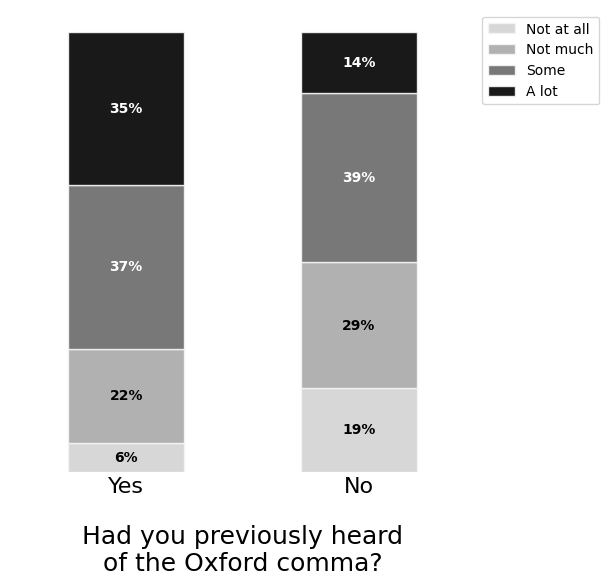

In [23]:
# Add the text! Fix the text!
# Copy the code from before.
ax = table.plot.bar(stacked = True, color = ['lightgrey', 'darkgrey', 'dimgrey', 'black'], figsize = [6,6], 
                    rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0)
ax.get_yaxis().set_visible(False) 
plt.xlabel('Had you previously heard\nof the Oxford comma?', fontsize = 18, labelpad = 20)
plt.legend(bbox_to_anchor = [1,1])


for i in range(len(ax.patches)):
    x,y,width,height = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(),\
        ax.patches[i].get_height()
    center_x = x+width/2
    center_y = y+height/2
    label = f'{height*100:.0f}%'
    color = 'black'
    if i > 3:
        color = 'white'
    plt.text(center_x, center_y, label, ha = 'center', va = 'center', color = color, weight = 'bold')
plt.show()

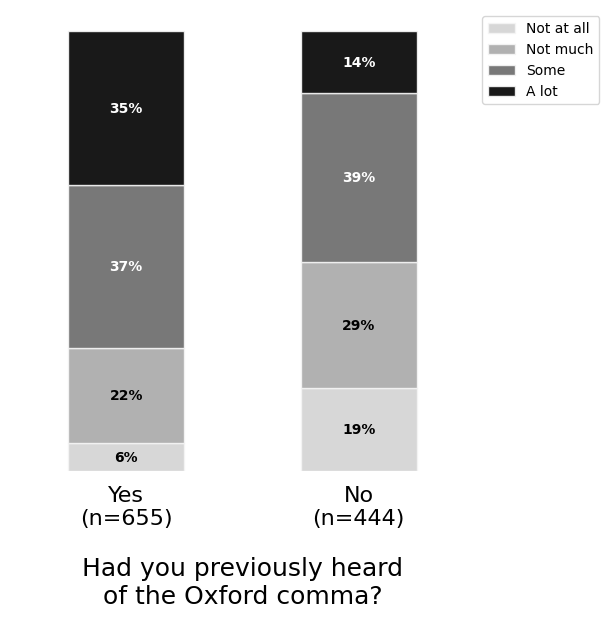

In [24]:
# Clarify in the x-axis labels the count of each category.
# Add the text! Fix the text!
# Copy the code from before.
ax = table.plot.bar(stacked = True, color = ['lightgrey', 'darkgrey', 'dimgrey', 'black'], figsize = [6,6], 
                    rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0)
ax.get_yaxis().set_visible(False) 
plt.xlabel('Had you previously heard\nof the Oxford comma?', fontsize = 18, labelpad = 20)
plt.legend(bbox_to_anchor = [1,1])

for i in range(len(ax.patches)):
    x,y,width,height = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(),\
        ax.patches[i].get_height()
    center_x = x+width/2
    center_y = y+height/2
    label = f'{height*100:.0f}%'
    color = 'black'
    if i > 3:
        color = 'white'
    plt.text(center_x, center_y, label, ha = 'center', va = 'center', color = color, weight = 'bold')

sums = raw_table.sum(axis = 1)
x_labels = [sums.index[i] + '\n(n=' + str(sums.iloc[i]) + ')' for i in range(len(sums))]
plt.xticks([0,1], labels = x_labels)
plt.tick_params(pad = 10)
plt.show()

In [25]:
raw_table

care_about_comma,Not at all,Not much,Some,A lot
heard_of_comma,,,,
Yes,42,141,243,229
No,84,127,171,62


In [26]:
table

care_about_comma,Not at all,Not much,Some,A lot
heard_of_comma,,,,
Yes,0.064122,0.215267,0.370992,0.349618
No,0.189189,0.286036,0.385135,0.139640


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Parker White\\vscode Python\\Python\\Fall 2025\\Data VIs\\Images\\Stacked.png'

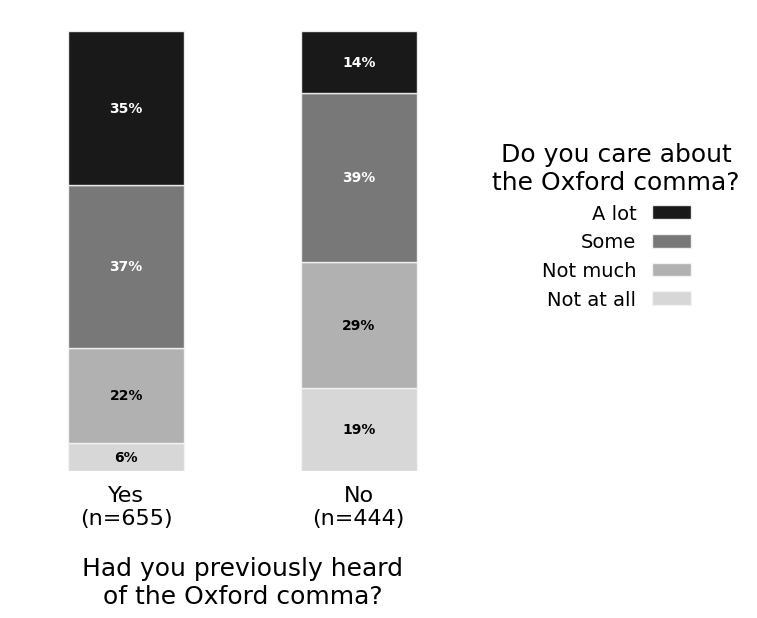

In [27]:
# Let's fix the legend now, and maybe talk about coordinates.
ax = table.plot.bar(stacked = True, color = ['lightgrey', 'darkgrey', 'dimgrey', 'black'], figsize = [6,6], 
                    rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0)
ax.get_yaxis().set_visible(False) 
plt.xlabel('Had you previously heard\nof the Oxford comma?', fontsize = 18, labelpad = 20)
plt.legend(bbox_to_anchor = [1,1]) #just moving it out of the way

for i in range(len(ax.patches)):
    x,y,width,height = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(),\
        ax.patches[i].get_height()
    center_x = x+width/2
    center_y = y+height/2
    label = f'{height*100:.0f}%'
    color = 'black'
    if i > 3:
        color = 'white'
    plt.text(center_x, center_y, label, ha = 'center', va = 'center', color = color, weight = 'bold')

sums = raw_table.sum(axis = 1)
x_labels = [sums.index[i] + '\n(n=' + str(sums.iloc[i]) + ')' for i in range(len(sums))]
plt.xticks([0,1], labels = x_labels)
plt.tick_params(pad = 10)


handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles = handles[::-1], labels = labels[::-1], bbox_to_anchor = [1, 0.75], title = 'Do you care about\nthe Oxford comma?', 
                 title_fontsize = 18, fontsize = 14, markerfirst = False, frameon = False) 
leg.get_title().set_multialignment('center')
plt.savefig('Images/Stacked.png', bbox_inches='tight')
plt.show()

In [ ]:
# What do you conclude from the plot?